### Additive Synthesis
- Additive synthesis creates complex sounds by adding multiple sine waves together. 
- Each sine wave can have a different frequency and amplitude, and their sum creates a more complex sound.

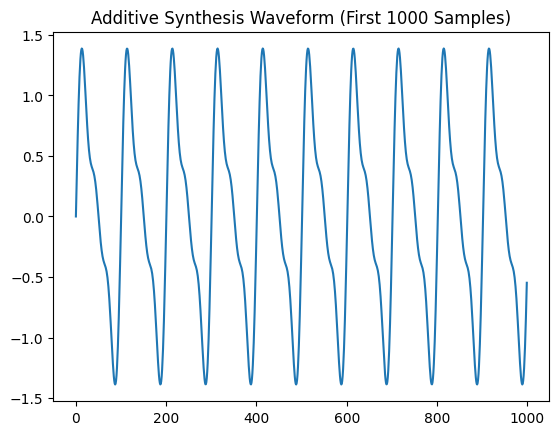

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

# Function for additive synthesis
def additive_synthesis(frequencies, amplitudes, duration=1.0, sample_rate=44100):
    """
    Sums multiple sine waves to create a complex sound.
    
    frequencies: List of frequencies of the sine waves (Hz)
    amplitudes: List of amplitudes of the sine waves
    duration: Duration of the sound in seconds
    sample_rate: Number of samples per second (default 44100)
    """
    # Create a time array for the sound duration
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Start with an empty signal (zero array)
    signal = np.zeros_like(t)
    
    # Sum sine waves with different frequencies and amplitudes
    for f, a in zip(frequencies, amplitudes):
        signal += a * np.sin(2 * np.pi * f * t)
        
    return signal

# Example usage
frequencies = [440, 880, 1320]  # A4, A5, E6
amplitudes = [1.0, 0.5, 0.25]   # Amplitudes for each frequency
signal = additive_synthesis(frequencies, amplitudes)

# Plot the waveform (first 1000 samples)
plt.plot(signal[:1000])
plt.title("Additive Synthesis Waveform (First 1000 Samples)")
plt.show()

# Save the signal to a WAV file
output_file = r'synthesized_sounds\additive_synthesis.wav'
sf.write(output_file, signal, 44100)  # Save signal as a .wav file with a sample rate of 44100 Hz

# Play the sound (use IPython's audio display to play within Jupyter notebook)
ipd.Audio(output_file)


In [3]:
!pip show soundfile

Name: soundfile

DEPRECATION: Loading egg at c:\users\omolp094\appdata\local\programs\python\python311\lib\site-packages\pybluez-0.30-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\omolp094\appdata\local\programs\python\python311\lib\site-packages\sleeppy-0.2.21-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330



Version: 0.12.1
Summary: An audio library based on libsndfile, CFFI and NumPy
Home-page: https://github.com/bastibe/python-soundfile
Author: Bastian Bechtold
Author-email: basti@bastibe.de
License: BSD 3-Clause License
Location: C:\Users\OMOLP094\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: cffi
Required-by: librosa


### What’s happening

- We create a time array t from 0 to the duration of the sound (1 second).
- For each frequency and its amplitude, we generate a sine wave using np.sin(), then sum all of them.
- The result is a complex waveform made up of multiple sine waves.

### Subtractive Synthesis

- Subtractive synthesis begins with a rich waveform (like a sawtooth) and uses filters to subtract unwanted frequencies, shaping the sound.

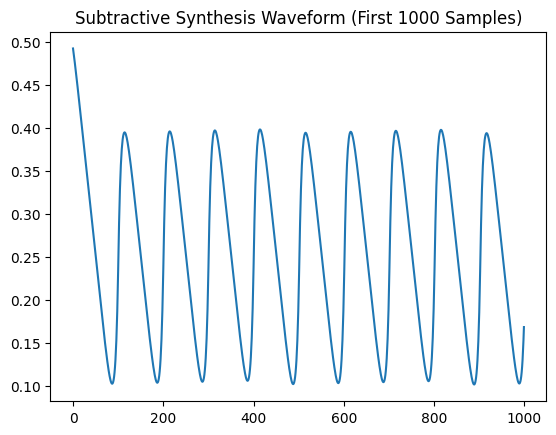

In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Function for subtractive synthesis
def subtractive_synthesis(frequency, duration=1.0, sample_rate=44100, cutoff=1000):
    """
    Starts with a sawtooth waveform and applies a low-pass filter to remove high frequencies.
    
    frequency: Frequency of the sawtooth wave (Hz)
    duration: Duration of the sound in seconds
    sample_rate: Number of samples per second (default 44100)
    cutoff: Cutoff frequency of the low-pass filter (Hz)
    """
    # Create a time array for the sound duration
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Generate a sawtooth waveform
    sawtooth_wave = 0.5 * (1 - np.mod(t * frequency, 1))  # Sawtooth wave equation
    
    # Apply a low-pass filter to the sawtooth waveform
    nyquist = 0.5 * sample_rate  # Nyquist frequency (half the sample rate)
    normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
    b, a = signal.butter(1, normal_cutoff, btype='low', analog=False)  # Create low-pass filter
    filtered_signal = signal.filtfilt(b, a, sawtooth_wave)  # Apply the filter
    
    return filtered_signal

# Example usage
signal_data = subtractive_synthesis(440)  # A4

# Plot first 1000 samples
plt.plot(signal_data[:1000])  
plt.title("Subtractive Synthesis Waveform (First 1000 Samples)")
plt.show()

# Save the sound wave as a WAV file using soundfile
output_filename = r'synthesized_sounds\subtractive_synthesis.wav'
sf.write(output_filename, signal_data, 44100)  # Save to WAV file using soundfile

# Play the saved sound file
def play_saved_sound(filename):
    # Use IPython's Audio to load and play the saved WAV file
    return Audio(filename)

# Play the sound from the saved file
play_saved_sound('synthesized_sounds\subtractive_synthesis.wav')


### What’s happening

- We start by creating a sawtooth waveform using np.mod() to generate a repeating pattern.
- Then, a low-pass filter is applied to remove high-frequency components, making the sound smoother.

### Frequency Modulation (FM) Synthesis

- FM synthesis involves modulating the frequency of one waveform (carrier) using another waveform (modulator). 
- This creates complex harmonic content.

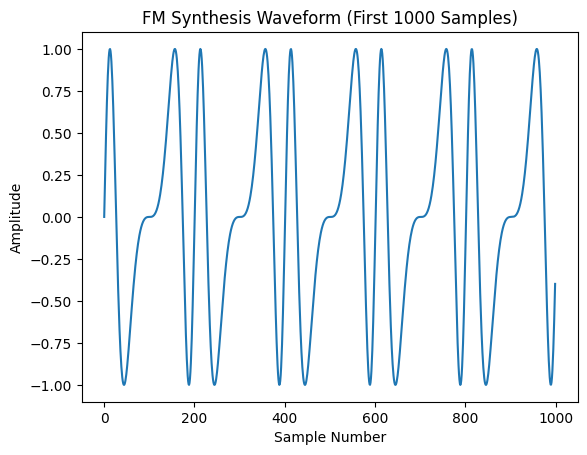

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Function for FM synthesis
def fm_synthesis(carrier_freq, modulator_freq, modulation_index, duration=1.0, sample_rate=44100):
    """
    Modulates the frequency of the carrier signal with the modulator signal.
    
    carrier_freq: Frequency of the carrier (Hz)
    modulator_freq: Frequency of the modulator (Hz)
    modulation_index: Depth of modulation
    duration: Duration of the sound in seconds
    sample_rate: Number of samples per second (default 44100)
    """
    # Create a time array for the sound duration
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Modulator signal (modulates the carrier)
    modulator = np.sin(2 * np.pi * modulator_freq * t) * modulation_index
    
    # Carrier signal with frequency modulation
    carrier = np.sin(2 * np.pi * carrier_freq * t + modulator)
    
    return carrier

# Example usage for FM synthesis
carrier_freq = 440    # Carrier frequency (Hz), e.g., A4 note
modulator_freq = 220  # Modulator frequency (Hz), e.g., A3 note
modulation_index = 2.0  # Modulation depth
duration = 2.0  # Duration of the sound (seconds)
sample_rate = 44100  # Sample rate (samples per second)

# Generate the FM synthesis signal
signal_data = fm_synthesis(carrier_freq, modulator_freq, modulation_index, duration, sample_rate)

# Plot first 1000 samples of the waveform
plt.plot(signal_data[:1000])
plt.title("FM Synthesis Waveform (First 1000 Samples)")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

# Save the sound wave as a WAV file using soundfile
output_filename = r"synthesized_sounds\fm_synthesis_output.wav"
sf.write(output_filename, signal_data, sample_rate)  # Save to WAV file

# Function to play the saved sound file
def play_saved_sound(filename, sample_rate=44100):
    # Use IPython's Audio to load and play the saved WAV file, specifying the sample rate
    return Audio(filename, rate=sample_rate)

# Play the sound from the saved file
play_saved_sound(output_filename)


### What’s happening

- A modulator wave (at modulator_freq) modulates the frequency of the carrier wave (at carrier_freq).
- The modulation_index controls the intensity of this frequency modulation.


### Explanation

#### FM Synthesis:
- **The modulator** is a sine wave that modulates the frequency of the carrier signal.
- **modulation_index** controls the depth of modulation. A higher value means a more pronounced modulation effect.

#### Example Parameters:
- `carrier_freq = 440`: The frequency of the carrier wave (A4 note).
- `modulator_freq = 220`: The frequency of the modulator wave (A3 note).
- `modulation_index = 2.0`: The depth of modulation, which determines the extent of frequency variation.
- `duration = 2.0`: The length of the sound in seconds.
- `sample_rate = 44100`: The sample rate for high-quality audio (standard for audio CDs).

#### Plotting the Waveform:
- The first 1000 samples of the signal are plotted for visualization.

#### Saving the Sound:
- The generated sound is saved as `fm_synthesis_output.wav` using the `soundfile` library.

#### Playing the Sound:
- The saved `.wav` file is played using `IPython.display.Audio`.

### Wavetable Synthesis

- Wavetable synthesis uses pre-recorded waveforms (tables) and interpolates between them. 
- This creates evolving and dynamic sounds.

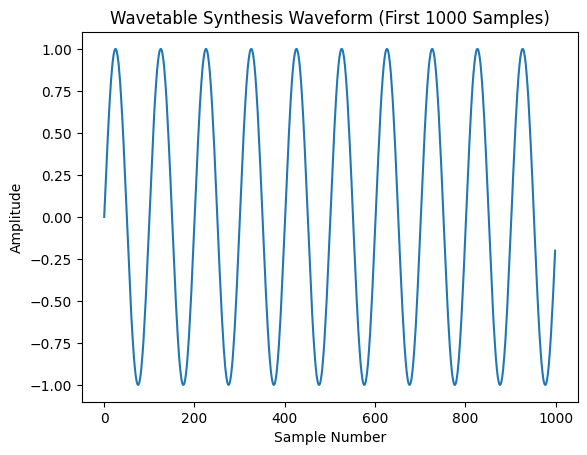

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Function for wavetable synthesis
def wavetable_synthesis(wavetable, frequency, duration=1.0, sample_rate=44100):
    """
    Uses a wavetable and frequency to create a sound.
    
    wavetable: A table (array) of pre-recorded waveforms
    frequency: The frequency to play the wavetable at (Hz)
    duration: Duration of the sound in seconds
    sample_rate: Number of samples per second (default 44100)
    """
    # Number of samples for the duration of the sound
    num_samples = int(sample_rate * duration)
    
    # Create a phase array (to loop through the wavetable)
    phase = np.linspace(0, 1, num_samples) * frequency
    phase = np.mod(phase, 1)  # Wrap around the phase (keep it within the wavetable length)
    
    # Get indices into the wavetable
    indices = (phase * len(wavetable)).astype(int)
    
    return wavetable[indices]

# Example usage
wavetable = np.sin(2 * np.pi * np.linspace(0, 1, 1024))  # Simple sine wave
signal = wavetable_synthesis(wavetable, 440)  # A4

# Plot first 1000 samples of the waveform
plt.plot(signal[:1000])
plt.title("Wavetable Synthesis Waveform (First 1000 Samples)")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

# Save the generated sound as a WAV file using soundfile
output_filename = r"synthesized_sounds\wavetable_synthesis_output.wav"
sf.write(output_filename, signal, 44100)  # Save to WAV file

# Function to play the saved sound file
def play_saved_sound(filename, sample_rate=44100):
    # Use IPython's Audio to load and play the saved WAV file, specifying the sample rate
    return Audio(filename, rate=sample_rate)

# Play the sound from the saved file
play_saved_sound(output_filename)


### What’s happening

- The wavetable is a pre-recorded waveform (e.g., a sine wave).
- We generate the sound by mapping the frequency to indices in the wavetable and interpolating between them.

### Granular Synthesis

- Granular synthesis takes small snippets (grains) of an audio signal and manipulates them to create textures and complex sound effects.

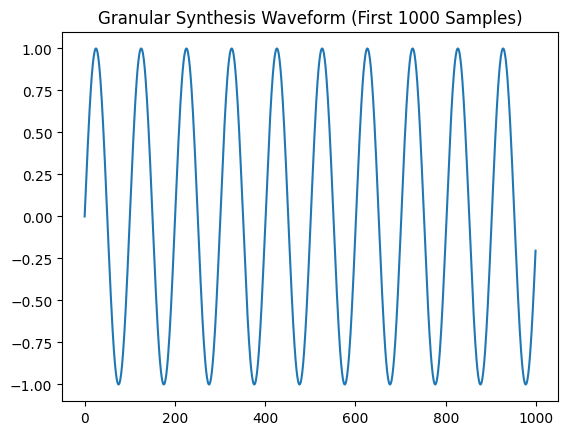

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Function for granular synthesis
def granular_synthesis(signal, grain_size, overlap, sample_rate=44100):
    """
    Divides the signal into small grains and reconstructs them.
    
    signal: Input audio signal
    grain_size: Number of samples in each grain
    overlap: Fraction of overlap between grains
    sample_rate: Number of samples per second (default 44100)
    """
    num_samples = len(signal)
    grains = []
    
    # Create grains by slicing the signal into small chunks
    for start in range(0, num_samples - grain_size, int(grain_size * (1 - overlap))):
        grain = signal[start:start + grain_size]
        grains.append(grain)
        
    # Concatenate all grains into one long signal
    return np.concatenate(grains)

# Example usage
duration = 1.0  # seconds
sample_rate = 44100
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = np.sin(2 * np.pi * 440 * t)  # A4
grain_size = 1024
overlap = 0.5
signal = granular_synthesis(signal, grain_size, overlap)

# Plot first 1000 samples
plt.plot(signal[:1000])
plt.title("Granular Synthesis Waveform (First 1000 Samples)")
plt.show()

# Save the generated sound as a WAV file using soundfile
output_filename = r"synthesized_sounds\granular_synthesis_output.wav"
sf.write(output_filename, signal, sample_rate)  # Save to WAV file

# Function to play the saved sound file
def play_saved_sound(filename, sample_rate=44100):
    # Use IPython's Audio to load and play the saved WAV file, specifying the sample rate
    return Audio(filename, rate=sample_rate)

# Play the sound from the saved file
play_saved_sound(output_filename)


### What’s happening

- The signal is divided into small grains, each of size grain_size.
- These grains are overlapped and recombined to form a new sound.

### Physical Modeling Synthesis

- Physical Modeling Synthesis (PMS) simulates the behavior of physical instruments by modeling their physical properties and interactions. 

- For simplicity, we can model some basic physical systems like plucked strings or wind instruments, which are based on well-known physical principles.

- One of the simplest models we can implement is a string vibration model using the Karplus-Strong algorithm, which simulates the behavior of a plucked string. 

- This algorithm generates a sound by repeatedly filtering white noise with a feedback loop, emulating the plucked string's vibrations.

- Below is an implementation of Physical Modeling Synthesis using a simplified plucked string model (Karplus-Strong algorithm)

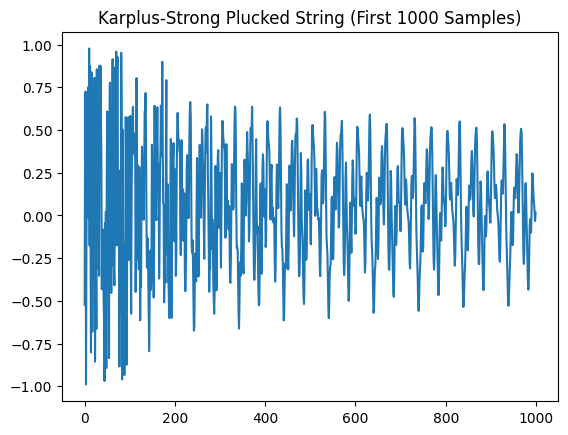

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Function for Karplus-Strong synthesis (Plucked String Model)
def karplus_strong(frequency, duration=1.0, sample_rate=44100):
    """
    Simulates the sound of a plucked string using the Karplus-Strong algorithm.
    
    frequency: Frequency of the plucked string (Hz)
    duration: Duration of the sound in seconds
    sample_rate: Number of samples per second (default 44100)
    """
    # Calculate the number of samples in the signal
    num_samples = int(sample_rate * duration)
    
    # Calculate the number of samples in the initial delay (related to the string length)
    delay_length = int(sample_rate / frequency)
    
    # Initialize the buffer with random values (white noise)
    buffer = np.random.rand(delay_length) * 2 - 1  # Random noise between -1 and 1
    
    # Initialize the output signal
    signal = np.zeros(num_samples)
    
    # Feedback loop for the plucked string simulation
    for i in range(num_samples):
        signal[i] = buffer[i % delay_length]
        
        # Apply a low-pass filter (decay) for the string vibration decay
        buffer[i % delay_length] = 0.5 * (buffer[i % delay_length] + buffer[(i + 1) % delay_length])
    
    return signal

# Example usage: Simulate a plucked string (frequency of 440 Hz, duration of 2 seconds)
frequency = 440  # A4 note
duration = 2.0  # seconds
sample_rate = 44100  # standard sample rate

# Generate the signal using Karplus-Strong synthesis
signal = karplus_strong(frequency, duration, sample_rate)

# Plot first 1000 samples
plt.plot(signal[:1000])
plt.title("Karplus-Strong Plucked String (First 1000 Samples)")
plt.show()

# Save the generated sound as a WAV file using soundfile
output_filename = r"synthesized_sounds\karplus_strong_output.wav"
sf.write(output_filename, signal, sample_rate)  # Save to WAV file

# Function to play the saved sound file
def play_saved_sound(filename, sample_rate=44100):
    # Use IPython's Audio to load and play the saved WAV file, specifying the sample rate
    return Audio(filename, rate=sample_rate)

# Play the sound from the saved file
play_saved_sound(output_filename)


### Explanation of the Code:

#### Karplus-Strong Algorithm:

- **Plucked String Model**: The function `karplus_strong()` simulates the sound of a plucked string. The algorithm starts by generating a short burst of random noise (mimicking the plucking of a string) and then applies a low-pass filter (a simple averaging of neighboring samples) to simulate the damping of the vibration over time.

#### Parameters:

- **frequency**: The frequency of the plucked string, determining the pitch of the note (e.g., 440 Hz for the A4 note).
- **duration**: The duration of the sound.
- **sample_rate**: The sampling rate, typically set to 44100 for CD-quality audio.

#### Plotting:

- The first 1000 samples of the generated waveform are plotted to visualize the string's vibration pattern.

#### Saving and Playing the Sound:

- The generated sound is saved as a `.wav` file using the `soundfile.write()` function.
- The sound is played back using IPython's `Audio` class.

### Sample-Based Synthesis

- Sample-based synthesis involves using pre-recorded sound samples (like a piano or drum sound) and playing them back at different pitches.

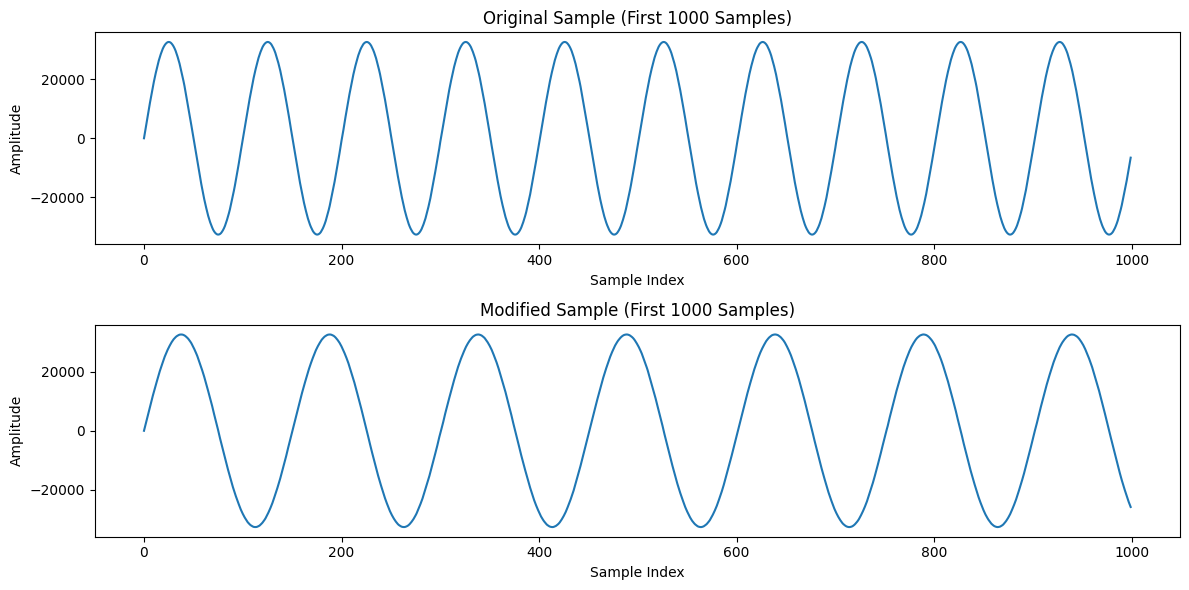

In [19]:
import numpy as np
import scipy.io.wavfile as wav
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio

# Function to load a sample
def load_sample(file_path):
    sample_rate, data = wav.read(file_path)
    return data, sample_rate

# Function to change pitch (time-stretching and resampling)
def change_pitch(data, old_rate, new_rate):
    # Resample the audio to the new sample rate
    number_of_samples = round(len(data) * float(new_rate) / old_rate)
    resampled_data = np.interp(np.linspace(0.0, len(data), number_of_samples), np.arange(len(data)), data)
    return resampled_data

# Function to save the modified sample
def save_sample(data, sample_rate, output_file):
    sf.write(output_file, data, sample_rate)

# Function to load and play audio using IPython
def play_audio(file_path):
    return Audio(file_path)

# Example usage
file_path = r'synthesized_sounds\wavetable_synthesis_output.wav'  # Replace with the path to your audio file
output_file = r'synthesized_sounds\sample_synthesis_modified_audio.wav'  # Output file name

# Load the sample
sample_data, sample_rate = load_sample(file_path)

# Change pitch (e.g., change pitch by 1.5x)
new_sample_rate = int(sample_rate * 1.5)
modified_sample = change_pitch(sample_data, sample_rate, new_sample_rate)

# Save the modified sample
save_sample(modified_sample, new_sample_rate, output_file)

# Plot the original and modified waveform for comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sample_data[:1000])  # Plot first 1000 samples of the original
plt.title("Original Sample (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(modified_sample[:1000])  # Plot first 1000 samples of the modified sample
plt.title("Modified Sample (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Play the modified audio
play_audio(output_file)


## Explanation 

This code demonstrates **sample-based synthesis** by manipulating an audio sample through pitch shifting. Here's a breakdown of what happens:

1. **Loading the Sample**: 
   - The audio sample is loaded using the `load_sample` function, which reads a WAV file and returns the audio data and its sample rate.
   
2. **Pitch Shifting**:
   - The `change_pitch` function modifies the pitch of the sample by resampling the audio data at a new sample rate. 
   - Increasing the sample rate (e.g., 1.5x) raises the pitch, and decreasing it lowers the pitch. This process alters the length (time-stretching or compressing) of the sample while preserving the overall sound characteristics.

3. **Saving the Modified Sample**:
   - After changing the pitch, the modified audio is saved as a new file using the `save_sample` function.

4. **Visualization**:
   - The script plots the waveforms of both the original and modified audio samples, showing how the time-domain characteristics of the audio change due to pitch shifting.

5. **Playing the Audio**:
   - Finally, the modified audio is played back using IPython's `Audio` function, allowing you to listen to the pitch-shifted sound.

This approach represents **sample-based synthesis**, where you manipulate pre-recorded audio samples—by changing properties like pitch or duration—to create new sounds or effects.
